In [51]:
data_folder = '..\\data_analysis\\data_analysis'
# data_folder = '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/Semester projects/__Past/2020 - Spring/Swarm Intuitive /DATA/data_analysis'

In [83]:
# needed to use modules/scripts from parent folder
import os,sys
print(sys.version)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import sys
import json
import os
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]


In [53]:
subjects_folders = [os.path.join(data_folder, o) for o in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder,o)) and 'final' in o and 'leap2' not in o]

In [54]:
maneuvers = ['Left','Right','up','down','forward','backward','contract','expand']

In [55]:
files_man = {}
for i,maneuver in enumerate(maneuvers):
    files_man[maneuver] = []
    for folder in subjects_folders:
        files_man[maneuver].append([os.path.join(folder, o) for o in os.listdir(folder) if os.path.isfile(os.path.join(folder,o)) and maneuver in o and 'CLEAN' not in o])

At this point we have a dictionary containing, for each maneuver, all the file names corresponding to this maneuver for the subjects.

In [56]:
file_test = files_man[maneuvers[1]][0][0]
print(file_test)
#file_test = file_test[:-4] # To remove the .txt

..\data_analysis\data_analysis\final_10_leap\Right_period_20_amplitude_100_inst_1_2020_Aug_22_06_19_26PM.csv.txt


In [57]:
def get_position_signals(file):
    data_test = pd.read_csv(file)
    list_position = ['pos_{}_{}_{}'.format(x,hand,bone) for x in ['x','y','z'] for hand in [1,2] for bone in [1,4,8,12,16,20]]
    positions_signals = data_test[list_position]
    #print(np.shape(positions_signals))
    N = len(data_test['pos_x_1_1'])
    return(positions_signals)

In [145]:
def plot_position_hands(ax, positions_signals,n,man, scatter = 1, alpha = 0.05):
    col = cmap = plt.get_cmap('tab10')
    label_hand = ['Right Hand', 'Left Hand']

    col_simpl = ['r', 'b']

    pz = np.arange(0,1,1/len(positions_signals)) 
    colors_red = plt.cm.Reds(np.arange(0,1,1/len(positions_signals)))
    colors_red[:,-1] = pz 

    colors_blue = plt.cm.Blues(np.arange(0,1,1/len(positions_signals)))
    colors_blue[:,-1] = pz 

    for hand in [1, 2]:
        if hand==1:
            colors = colors_red
        else:
            colors = colors_blue
        for bone in [1,4,8,12,16,20]:
            if bone ==1:
                label_sel = label_hand[hand-1]
                col_plot = col(hand+1)
                size_plot = 100
            else:
                col_plot = col(hand-1)
                label_sel = ''
                size_plot = 10
            if scatter:
                scatter = ax.scatter(positions_signals['pos_x_{}_{}'.format(hand,bone)].values,-positions_signals['pos_z_{}_{}'.format(hand,bone)].values,positions_signals['pos_y_{}_{}'.format(hand,bone)].values, s = size_plot, color = colors,alpha = alpha, label = label_sel)
            else:
                ax.plot(positions_signals['pos_x_{}_{}'.format(hand,bone)].values,positions_signals['pos_z_{}_{}'.format(hand,bone)].values,positions_signals['pos_y_{}_{}'.format(hand,bone)].values,color = colors,label = label_sel)
    ax.set_xlim(-150,150)
    ax.set_ylim(-150,150)
    ax.set_zlim(0,400)
    ax.set_title('Subject {}: {} maneuver'.format(n,man))
    
    #red_patch = mpatches.Circle((0.5, 0.5), color='red', alpha = alpha*10, label='Right Hand')
    #blue_patch = mpatches.Circle((0.5, 0.5), color='blue', alpha = alpha*10, label='Left Hand')
    
    #ax.legend(handles = [red_patch, blue_patch], 
          #loc='center left', bbox_to_anchor=(1.0, .5), handler_map={mpatches.Circle: HandlerEllipse()})
    #legend1 = ax.legend(*scatter.legend_elements(num=2),
    #                loc="upper left", title="Ranking")
    #ax.add_artist(legend1)
    # plt.show()

In [146]:
# plot settings
import matplotlib as mpl

lw = 1.5

fs = 15

ts = 20

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'axes.titlesize' : ts,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [7, 3],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : False,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [147]:
from matplotlib.legend_handler import HandlerPatch

class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

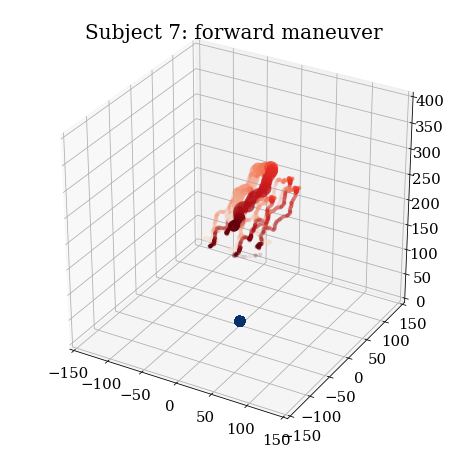

In [162]:
# CREATE SVG IMAGES 

how_many_mans = 5     # Here define which maneuver to use
how_many_subj = 7     # Here define which user to use. The subject number correspond to the one in the bar plots

for j in [how_many_mans-1]:
    fig = plt.figure(figsize = [8,8])
    for i in [how_many_subj-1]:
        ax = fig.add_subplot(1,1, 1, projection='3d')
        file = files_man[maneuvers[j]][i][0]
        positions_signals = get_position_signals(file)
        downs = positions_signals.iloc[0:len(positions_signals):1]
        plot_position_hands(ax, downs,i+1,maneuvers[j], scatter = 1)
fig.savefig(f"hand_motion\\sub{i+1}_man{maneuvers[j]}.svg", format='svg', bbox_inches='tight')

In [ ]:
# EXAMPLE VERTICAL POSITION CONTROL

how_many_mans = 3
how_many_subj = 4

for j in [how_many_mans-1]:
    fig = plt.figure(figsize = [8,8])
    for i in [how_many_subj-1]:
        idx = 1+i
        print(idx)
        ax = fig.add_subplot(1,1, 1, projection='3d')
        file = files_man[maneuvers[j]][i][0]
        positions_signals = get_position_signals(file)
        downs = positions_signals.iloc[0:len(positions_signals):1]
        plot_position_hands(ax, downs,i+1,maneuvers[j], scatter = 1, alpha = 0.05)


In [ ]:
data_hands = {}

for j in range(8):
    data_hands[j] = {}
    for i in range(10):
        filen = files_man[maneuvers[j]][i][0]
        data_hands[j][i] = get_position_signals(file)

In [ ]:
how_many_mans = 8
how_many_subj = 1

for j in range(how_many_mans):
    fig = plt.figure(figsize = [8,8])
    for i in range(how_many_subj):

how_many_subj = 1

for j in [how_many_mans-1]:
    fig = plt.figure(figsize = [8,8])
    for i in [how_many_subj-1]:
        idx = 1+i
        print(idx)
        ax = fig.add_subplot(1,1, 1, projection='3d')
        file = files_man[maneuvers[j]][i][0]
colors,label = label_sel)
    ax.set_xlim(-150,150)
        ax.set_ylim(-150,150)
            ax.set_zlim(0,400)
                plt.title('Subject {}: {} maneuver'.format(n,man))
                    plt.legend()
                        # plt.show()()
        ax = fig.add_subplot(1,how_many_subj, idx, projection='3d')

        file = files_man[maneuvers[j]][i][0]
        positions_signals = get_position_signals(file)
        downs = positions_signals.iloc[0:len(positions_signals):100]

        plot_position_hands(ax, downs,i+1,maneuvers[j], scatter = 0)



In [ ]:
how_many_mans = 1
how_many_subj = 1

for j in range(how_many_mans):
    fig = plt.figure(figsize = [8,8])
    for i in range(how_many_subj):
        idx = 1+i
        print(idx)
        ax = fig.add_subplot(1,how_many_subj, idx, projection='3d')
        plot_position_hands(ax, downs,i+1,maneuvers[j])


In [ ]:
for j in range(1):
    for i in range(1):
        file = files_man[maneuvers[j]][i][0]
        positions_signals = get_position_signals(file)
        plot_position_hands(positions_signals,i+1,maneuvers[j])

In [ ]:
# EXAMPLE VERTICAL VELOCITY CONTROL

how_many_mans = 8
how_many_subj = 10

for j in range(how_many_mans):
    for i in range(how_many_subj):
        idx = 1+i
        print(idx)
        fig = plt.figure(figsize = [8,8])
        ax = fig.add_subplot(1,1, 1, projection='3d')
        file = files_man[maneuvers[j]][i][0]
        positions_signals = get_position_signals(file)
        downs = positions_signals.iloc[0:len(positions_signals):1]
        plot_position_hands(ax, downs,i+1,maneuvers[j], scatter = 1)


In [ ]:
# EXAMPLE VERTICAL VELOCITY CONTROL

man = 1
how_many_subj = 10

j = man
for i in range(how_many_subj):
    idx = 1+i
    print(idx)
    fig = plt.figure(figsize = [8,8])
    ax = fig.add_subplot(1,1, 1, projection='3d')
    file = files_man[maneuvers[j]][i][0]
    positions_signals = get_position_signals(file)
    downs = positions_signals.iloc[0:len(positions_signals):1]
    plot_position_hands(ax, downs,i+1,maneuvers[j], scatter = 1)
